In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [2]:
import yfinance as yf
data = yf.download(tickers="BTC-USD" , start = "2022-02-01" ,end="2022-12-31" )
data = data.resample('1h').ffill()

# Display the fetched data
print(data)

data.to_csv('data1.csv')


[*********************100%%**********************]  1 of 1 completed
                             Open          High           Low         Close  \
Date                                                                          
2022-02-01 00:00:00  38481.765625  39115.132812  38113.664062  38743.273438   
2022-02-01 01:00:00  38481.765625  39115.132812  38113.664062  38743.273438   
2022-02-01 02:00:00  38481.765625  39115.132812  38113.664062  38743.273438   
2022-02-01 03:00:00  38481.765625  39115.132812  38113.664062  38743.273438   
2022-02-01 04:00:00  38481.765625  39115.132812  38113.664062  38743.273438   
...                           ...           ...           ...           ...   
2022-12-29 20:00:00  16552.322266  16651.755859  16508.683594  16642.341797   
2022-12-29 21:00:00  16552.322266  16651.755859  16508.683594  16642.341797   
2022-12-29 22:00:00  16552.322266  16651.755859  16508.683594  16642.341797   
2022-12-29 23:00:00  16552.322266  16651.755859  16508.683594 

In [3]:
data_dir = 'data1.csv'
df = pd.read_csv(data_dir)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-01 00:00:00,38481.765625,39115.132812,38113.664062,38743.273438,38743.273438,20288500328
1,2022-02-01 01:00:00,38481.765625,39115.132812,38113.664062,38743.273438,38743.273438,20288500328
2,2022-02-01 02:00:00,38481.765625,39115.132812,38113.664062,38743.273438,38743.273438,20288500328
3,2022-02-01 03:00:00,38481.765625,39115.132812,38113.664062,38743.273438,38743.273438,20288500328
4,2022-02-01 04:00:00,38481.765625,39115.132812,38113.664062,38743.273438,38743.273438,20288500328


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7969.000000,7969.000000,7969.000000,7969.000000,7969.000000,7.969000e+03
mean,27125.391084,27654.816126,26510.349423,27060.383520,27060.383520,3.012983e+10
std,9762.558894,9985.887112,9541.474335,9760.004263,9760.004263,1.252721e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,9.744636e+09
25%,19417.478516,19674.630859,19076.714844,19413.550781,19413.550781,2.272210e+10
50%,22196.730469,22649.121094,21257.453125,21769.255859,21769.255859,2.854614e+10
75%,38285.281250,39209.351562,37518.214844,38117.460938,38117.460938,3.448336e+10
max,47456.898438,48086.835938,47100.437500,47465.730469,47465.730469,1.189925e+11


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

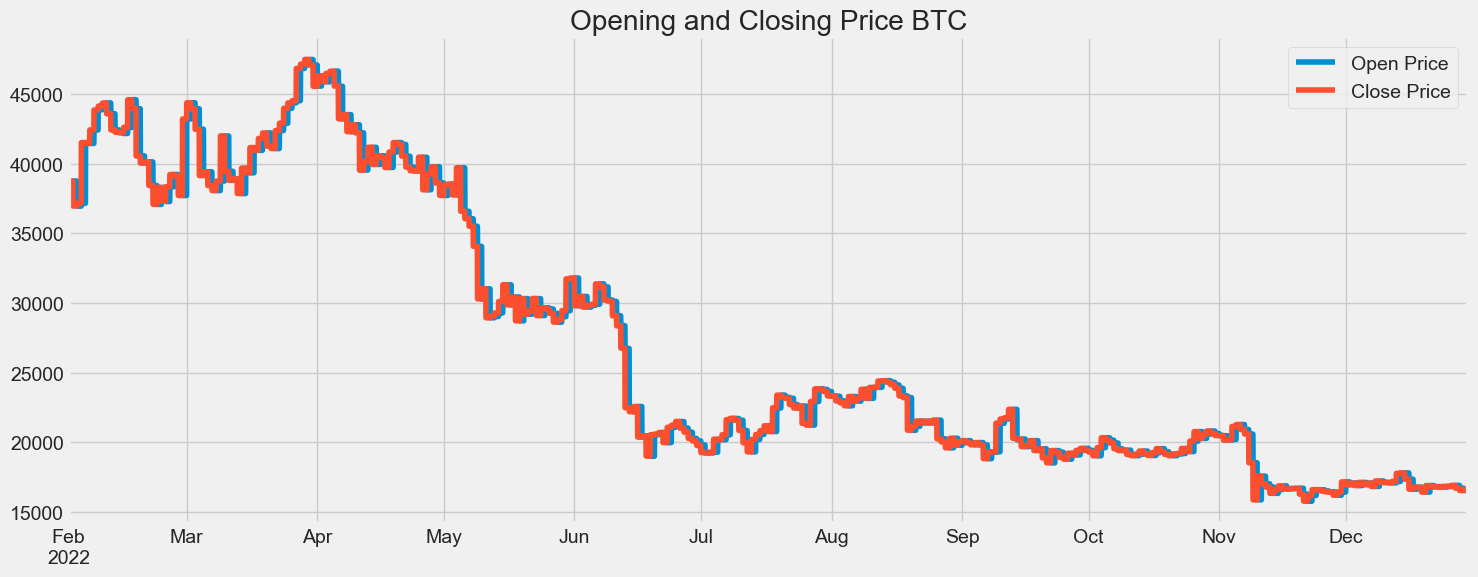

In [6]:
plt.figure(figsize=(15, 6))
df[r'Open'].plot()
df[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening and Closing Price BTC')
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

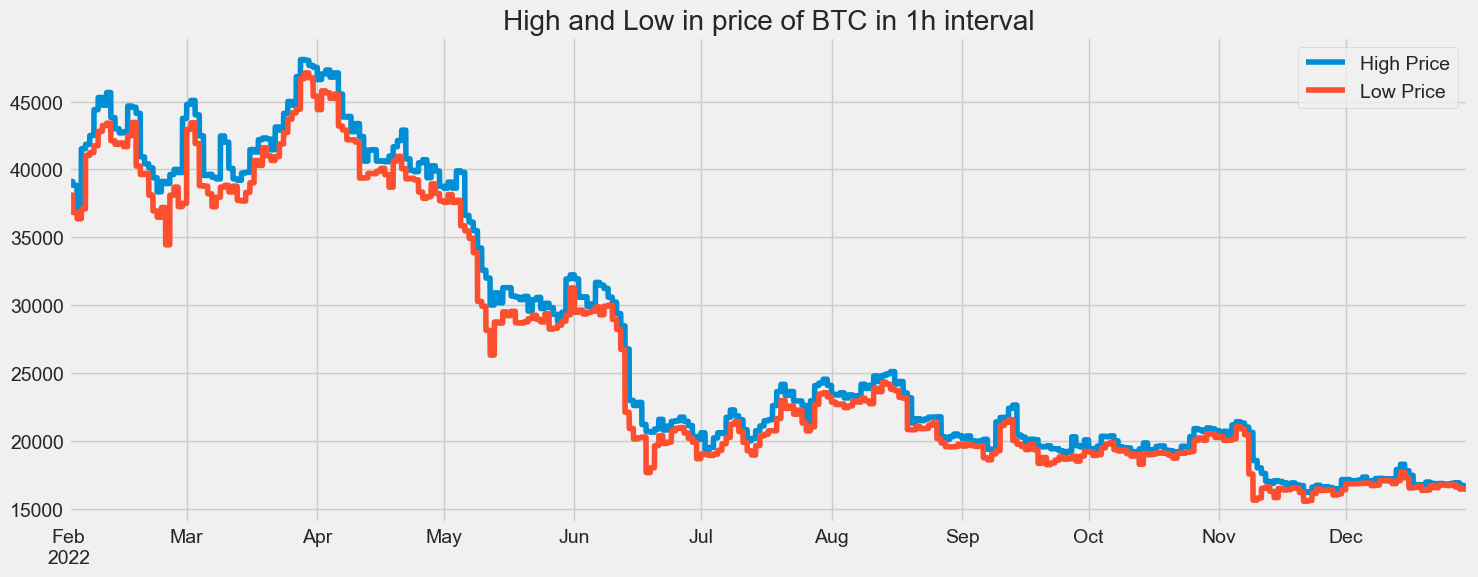

In [7]:
plt.figure(figsize=(15, 6))
df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High and Low in price of BTC in 1h interval')
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

In [8]:
import tensorflow as tf
model = tf.keras.models.load_model('Model.h5')

In [9]:
n_cols = 1
dataset = df[r'Close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(7969, 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))

In [11]:
train_size = int(len(data) * 0.01)
test_size = len(data) - train_size
print('Train Size: ', train_size, 'Test size: ', test_size)

Train Size:  79 Test size:  7890


In [12]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(79, 1)

In [13]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i <= time_steps:
        print('X_train: ', x_train)
        print('Y_train: ', y_train)

X_train:  [array([[0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.72465641],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
       [0.66814199],
  

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [16]:
x_train.shape, y_train.shape

((19, 60, 1), (19, 1))

In [17]:
time_steps = 60
test_data = scaled_data[train_size-time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [18]:
x_test.shape , y_test.shape

((7890, 60, 1), (7890, 1))

In [19]:
predictions = model.predict(x_test)

247/247 [==============================] - 3s 11ms/step


In [20]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(7890, 1)

In [21]:
y_test = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean(y_test-predictions)**2).round(2)
rmse

113.83

In [22]:
preds_acts = pd.DataFrame(data={'Predictions': predictions.flatten(), 'Actuals': y_test.flatten()})
preds_acts

,Predictions,Actuals
0,41325.003906,41500.875000
1,41333.488281,41500.875000
2,41367.605469,41500.875000
3,41406.566406,41500.875000
4,41440.843750,41500.875000
...,...,...
7885,16717.474609,16642.341797
7886,16717.560547,16642.341797
7887,16717.634766,16642.341797
7888,16717.697266,16642.341797


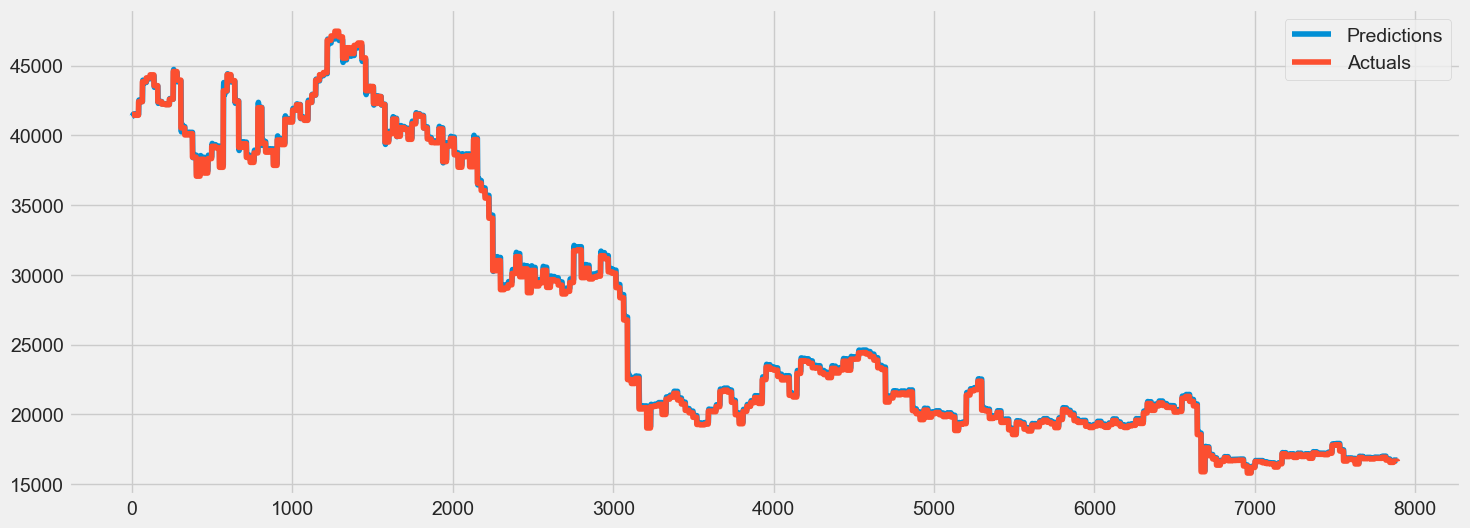

In [23]:
plt.figure(figsize=(16,6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

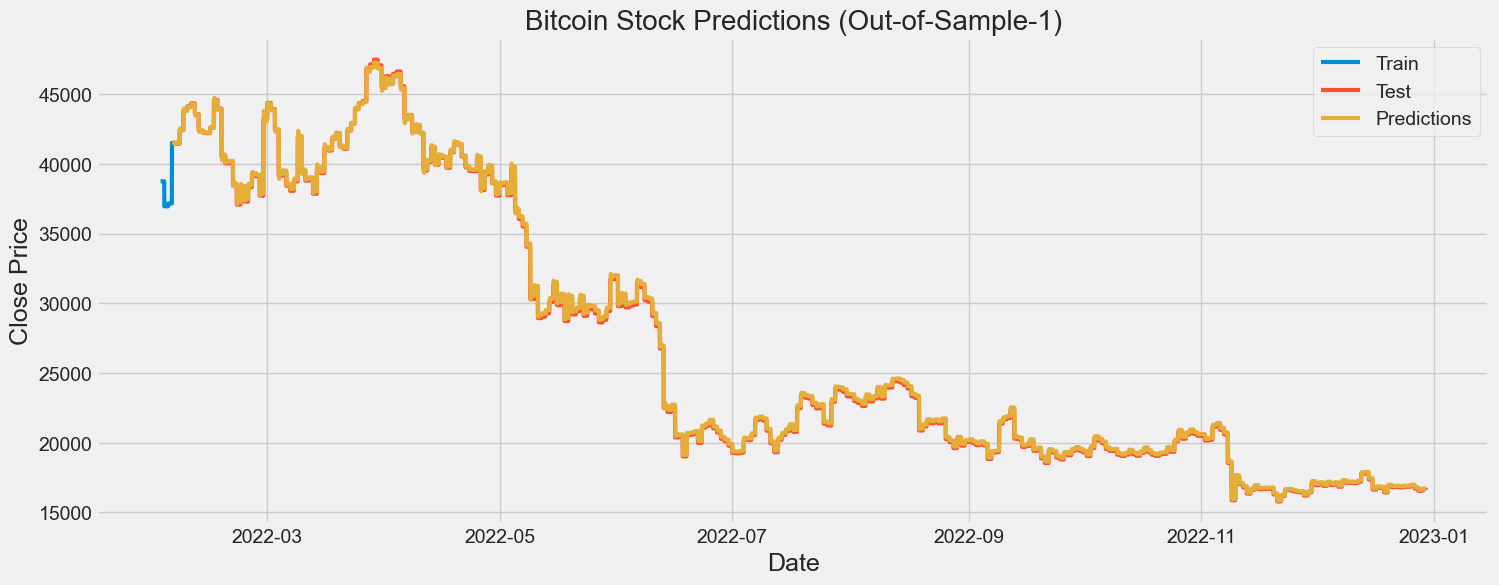

In [24]:
train = dataset.iloc[:train_size, 0:1]
test = dataset.iloc[train_size:, 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Bitcoin Stock Predictions (Out-of-Sample-1)', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train[r'Close'], linewidth=3)
plt.plot(test[r'Close'], linewidth=3)


plt.plot(test['Predictions'], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])